### 1. 데이터 탐색 및 전처리

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

df = pd.read_csv('ecommerce_sales_data.csv')
df.head(5)
# import autograph as ap

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국


In [2]:
df.isnull().sum()

OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64

In [3]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     120 non-null    int64         
 1   Product     120 non-null    object        
 2   Category    120 non-null    object        
 3   Quantity    120 non-null    int64         
 4   Price       120 non-null    int64         
 5   CustomerID  120 non-null    int64         
 6   Birthdate   120 non-null    object        
 7   OrderDate   120 non-null    datetime64[ns]
 8   Country     120 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 8.6+ KB


### 2. 매출 분석

In [4]:
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,78000
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,86000


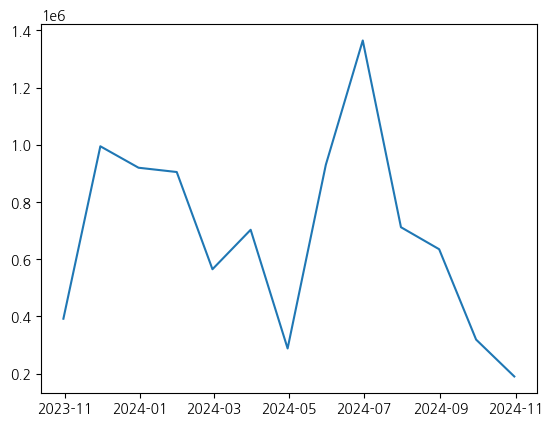

In [5]:
df_month = df.set_index('OrderDate')[['TotalRevenue']].resample('ME').sum()
plt.plot(df_month)
plt.show()

In [6]:
df.groupby('Category')[['TotalRevenue']].sum().nlargest(3,'TotalRevenue')

,TotalRevenue
Category,
Food,1966000
Electronics,1746000
Beauty,1493000


In [7]:
df.groupby('Country')[['TotalRevenue']].sum().nlargest(5,'TotalRevenue')

,TotalRevenue
Country,
미국,2238000
독일,1973000
중국,1766000
일본,1523000
대한민국,1419000


### 3. 고객 분석

In [8]:
df.groupby('CustomerID')[['TotalRevenue']].sum().nlargest(5,'TotalRevenue')

,TotalRevenue
CustomerID,
1007,334000
1354,245000
1141,241000
1589,215000
1632,192000


In [9]:
df.groupby('CustomerID')[['Quantity']].sum().nlargest(5,'Quantity')

,Quantity
CustomerID,
1007,8
1278,7
1421,7
1141,6
1029,5


### 4. 상품 분석

In [10]:
df.groupby('Product')[['Quantity']].sum().nlargest(5,'Quantity')

,Quantity
Product,
셔츠,25
립스틱,22
소설,21
역사책,20
커피,20


In [11]:
df.groupby(['Category','Product'])[['Quantity']].sum().loc[lambda c: c.groupby('Category')['Quantity'].idxmax()].sort_values('Quantity', ascending=False)

,,Quantity
Category,Product,
Clothing,셔츠,25
Beauty,립스틱,22
Books,소설,21
Food,커피,20
Electronics,노트북,15
Sports,요가매트,12


In [12]:
df.groupby('Product')[['Quantity']].mean().sort_values('Quantity', ascending=False).head(3)

,Quantity
Product,
주스,5.0
자기계발,5.0
요가매트,4.0


### 5. 시간 분석

<Axes: xlabel='OrderDate', ylabel='TotalRevenue'>

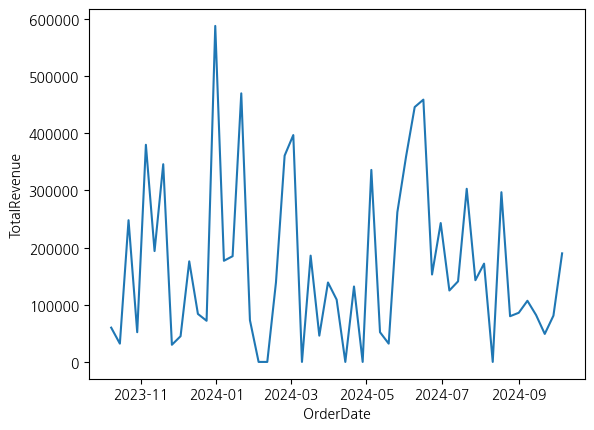

In [13]:
df_week = df.set_index('OrderDate')['TotalRevenue'].resample('W').sum()
sns.lineplot(data = df_week)

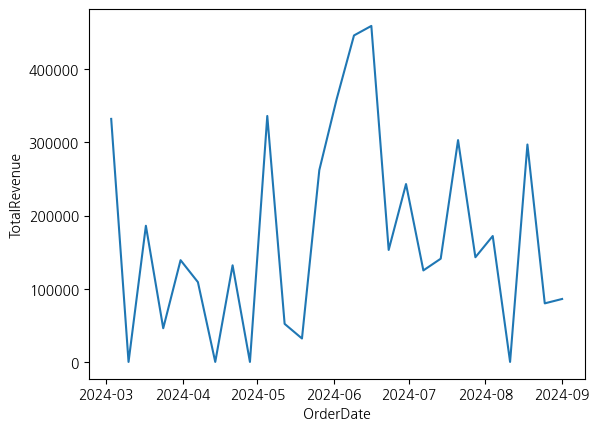

In [14]:
df_week = df[(df['OrderDate'] >= '2024-03-01') & (df['OrderDate'] < '2024-09-01')].set_index('OrderDate').resample('W')['TotalRevenue'].sum().reset_index()

sns.lineplot(data=df_week, x='OrderDate', y='TotalRevenue')
plt.show()

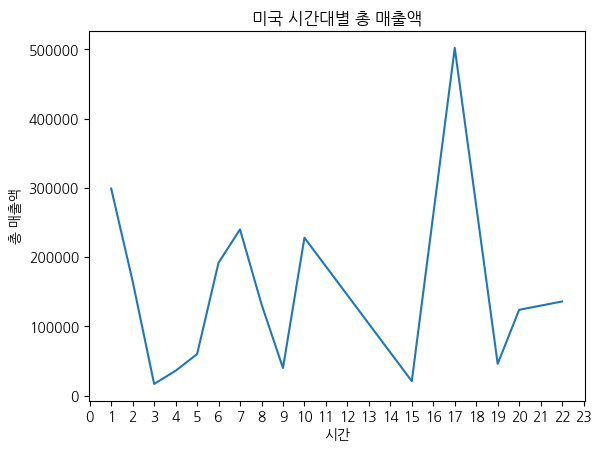

In [15]:
df_date = df[df['Country'] == '미국'].groupby(df['OrderDate'].dt.hour)['TotalRevenue'].sum()

sns.lineplot(x=df_date.index, y=df_date.values)
plt.title('미국 시간대별 총 매출액')
plt.xlabel('시간')
plt.ylabel('총 매출액')
plt.xticks(range(0, 24))
plt.show()

In [18]:
df_count = df.groupby('CustomerID')['OrderID'].count()
df_asdfsaf = round((len(df_count[df_count >=2]) / len(df_count)) * 100, 2)

print(f"재구매율 : {df_asdfsaf}%")

재구매율 : 8.11%
